# A. Import Library

In [1]:
# Import library dataframe
import numpy as np 
from numpy import mean 
import pandas as pd 

# Import library untuk visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Import library untuk preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

# Import library untuk modelling/analysis
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 

# Import library untuk model improvement
from sklearn.model_selection import GridSearchCV

# Mengatur display agar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Import library untuk mengabaikan peringatan
import warnings
warnings.filterwarnings("ignore")

print('Import Library Berhasil dilakukan ^_^')

Import Library Berhasil dilakukan ^_^


In [2]:
data = pd.read_csv('Rumah-Dijual-di-Semarang_milyar.csv')
data.head()

,Judul,Title_URL,Update,Agen,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga,Harga_New,Juta
0,Rumah Siap Huni Sangat Nyaman Di Bukitsari Sem...,https://www.rumah123.com/properti/semarang/hos...,Diperbarui 23 menit yang lalu oleh,Ginanjar,Rumah,"Banyumanik, Semarang",5,3,1.0,399.0,273.0,10,2.9,2.9,0.001
1,Rumah 2 Lantai di Pusponjolo Semarang Barat De...,https://www.rumah123.com/properti/semarang/hos...,Diperbarui 1 minggu yang lalu oleh,Rikza Bashony,Rumah,"Semarang Barat, Semarang",6,3,NaN,252.0,410.0,11,3.0,3.0,NaN
2,Rumah 2 Lantai Mewah Lingkungan Eksklusif di N...,https://www.rumah123.com/properti/semarang/hos...,Diperbarui 1 jam yang lalu oleh,Surono Mundiharjo,Rumah,"Semarang Barat, Semarang",3,3,1.0,120.0,110.0,5,1.6,1.6,NaN
3,dijual Rumah 2 Lantai di taman sari hills Bagus,https://www.rumah123.com/properti/semarang/hos...,Diperbarui 1 jam yang lalu oleh,Lili Susanto,Rumah,"Tembalang, Semarang",4,3,1.0,200.0,100.0,8,2.2,2.2,NaN
4,Rumah Siap Huni Di Tirto Agung Banyumanik Sema...,https://www.rumah123.com/properti/semarang/hos...,Diperbarui 2 jam yang lalu oleh,Didik C,Rumah,"Banyumanik, Semarang",4,3,2.0,300.0,200.0,11,3.2,3.2,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13386 entries, 0 to 13385
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Judul        13386 non-null  object 
 1   Title_URL    13386 non-null  object 
 2   Update       13386 non-null  object 
 3   Agen         13386 non-null  object 
 4   Jenis_Rumah  13386 non-null  object 
 5   Lokasi       13386 non-null  object 
 6   KT           13386 non-null  int64  
 7   KM           13386 non-null  int64  
 8   Garasi       8637 non-null   float64
 9   LT           13380 non-null  float64
 10  LB           13344 non-null  float64
 11  KPR_bulanan  13386 non-null  int64  
 12  Harga        13386 non-null  float64
 13  Harga_New    13386 non-null  float64
 14  Juta         1 non-null      float64
dtypes: float64(6), int64(3), object(6)
memory usage: 1.5+ MB


In [4]:
df = data.drop(["Judul","Title_URL","Update","Agen",'Harga','Juta'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13386 entries, 0 to 13385
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Jenis_Rumah  13386 non-null  object 
 1   Lokasi       13386 non-null  object 
 2   KT           13386 non-null  int64  
 3   KM           13386 non-null  int64  
 4   Garasi       8637 non-null   float64
 5   LT           13380 non-null  float64
 6   LB           13344 non-null  float64
 7   KPR_bulanan  13386 non-null  int64  
 8   Harga_New    13386 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 941.3+ KB


In [6]:
df.describe()

,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
count,13386.000000,13386.000000,8637.000000,13380.000000,13344.000000,13386.000000,13386.000000
mean,3.876139,2.496638,1.469144,175.695067,158.505396,5.700060,1.662923
std,3.360815,2.526133,1.049991,120.745999,123.039671,4.471658,1.199599
min,2.000000,1.000000,1.000000,1.000000,-140.000000,1.000000,0.300000
25%,2.000000,1.000000,1.000000,101.000000,72.000000,2.000000,0.700000
50%,3.000000,2.000000,1.000000,140.000000,124.000000,4.000000,1.300000
75%,4.000000,3.000000,2.000000,210.000000,200.000000,8.000000,2.350000
max,60.000000,47.000000,23.000000,3905.000000,4555.000000,18.000000,5.000000


In [7]:
df.isna().sum()

Jenis_Rumah       0
Lokasi            0
KT                0
KM                0
Garasi         4749
LT                6
LB               42
KPR_bulanan       0
Harga_New         0
dtype: int64

In [8]:
df.duplicated().sum()

2751

In [9]:
# Menghapus data duplikat
df = df.drop_duplicates()

# Mengecek kembali data duplikat
print("\nJumlah data duplikat setelah dihapus:")
df.duplicated().sum()


Jumlah data duplikat setelah dihapus:


0

# Dataset yang dimasukan ke model

In [34]:
# df = dfn.drop(["Judul","Nama_Agen","Jenis_Rumah","Lokasi"], axis=1)
# df.head()

In [35]:
# df.isna().sum()

In [31]:
# df.duplicated().sum()

In [32]:
# # Menghapus data duplikat
# df = df.drop_duplicates()

In [33]:
# # Mengecek kembali data duplikat
# print("\nJumlah data duplikat setelah dihapus:")
# df.duplicated().sum()

# Data Cleaning



## Data Cleaning 1
Pada data cleaning 1 akan dilakukan pengisian data pada missing value (fillna) menggunakan median.


In [10]:
#Membuat variabel baru dengan mengcopy dataframe df karena akan dibuat 2 jenis data cleaning
df_cleaning1 = df.copy()
df_cleaning1.shape

(10635, 9)

In [11]:
#Mengecek missing value
df_cleaning1.isna().sum()

Jenis_Rumah       0
Lokasi            0
KT                0
KM                0
Garasi         3791
LT                6
LB               42
KPR_bulanan       0
Harga_New         0
dtype: int64

In [12]:
#Mengisi data menggunakan median
df_cleaning1['Garasi'].fillna(df['Garasi'].median(), inplace=True)
df_cleaning1['LT'].fillna(df['LT'].median(), inplace=True)
df_cleaning1['LB'].fillna(df['LB'].median(), inplace=True)

In [13]:
df_cleaning1.head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
0,Rumah,"Banyumanik, Semarang",5,3,1.0,399.0,273.0,10,2.9
1,Rumah,"Semarang Barat, Semarang",6,3,1.0,252.0,410.0,11,3.0
2,Rumah,"Semarang Barat, Semarang",3,3,1.0,120.0,110.0,5,1.6
3,Rumah,"Tembalang, Semarang",4,3,1.0,200.0,100.0,8,2.2
4,Rumah,"Banyumanik, Semarang",4,3,2.0,300.0,200.0,11,3.2


In [14]:
df_cleaning1.isna().sum()

Jenis_Rumah    0
Lokasi         0
KT             0
KM             0
Garasi         0
LT             0
LB             0
KPR_bulanan    0
Harga_New      0
dtype: int64

In [15]:
df_cleaning1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10635 entries, 0 to 13385
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Jenis_Rumah  10635 non-null  object 
 1   Lokasi       10635 non-null  object 
 2   KT           10635 non-null  int64  
 3   KM           10635 non-null  int64  
 4   Garasi       10635 non-null  float64
 5   LT           10635 non-null  float64
 6   LB           10635 non-null  float64
 7   KPR_bulanan  10635 non-null  int64  
 8   Harga_New    10635 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 830.9+ KB


In [16]:
# sns.pairplot(df_cleaning1)
# plt.show()

In [41]:
# df_kondisi1.rename(columns={' Harga New ': "Harga_New"}, inplace=True)
# df_kondisi1.columns

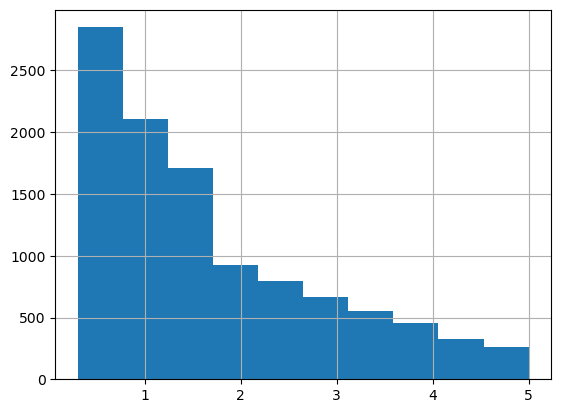

In [31]:
# lets draw histogram for MEDV
df.Harga_New.hist();

In [32]:
# check normality using scipy
from scipy.stats.mstats import normaltest

normaltest(df_cleaning1.Harga_New.values)

NormaltestResult(statistic=1315.051552969915, pvalue=2.7553930804033773e-286)

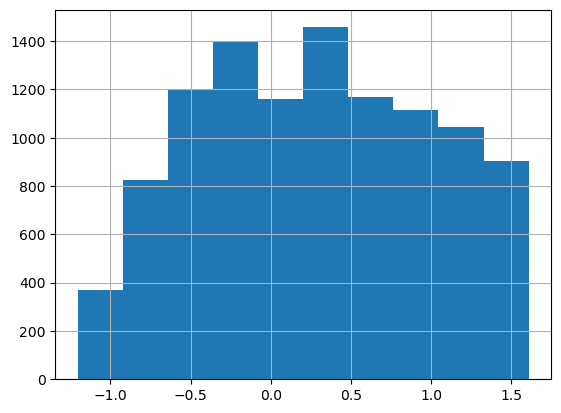

In [33]:
# Test log transformation
log_medv = np.log(df_cleaning1.Harga_New)
log_medv.hist();

In [34]:
normaltest(log_medv)

NormaltestResult(statistic=2623.8671684537217, pvalue=0.0)

In [46]:
# Test squared root transformation
sqrt_medv = np.sqrt(df_kondisi1.Harga_New)
sqrt_medv.hist();

In [47]:
# normaltest(sqrt_medv)

In [48]:
# # Test box cox transformation
# from scipy.stats import boxcox
# result = boxcox(df_kondisi1.Harga_New)
# boxcox_medv = result[0]
# lambda_ = result[1]

In [49]:
# lambda_

In [50]:
# plt.hist(boxcox_medv);

In [51]:
# normaltest(boxcox_medv)

## Data cleaning 2
Pada data cleaning 2, seluruh missing value akan dihapus dengan dropna.

In [16]:
#Membuat variabel baru dengan mengcopy dataframe df karena akan dibuat 2 jenis data cleaning
df_cleaning2 = df.copy()

In [17]:
#Menghapus missing  value dengan dropna
df_cleaning2.dropna(axis=0,inplace=True)
df_cleaning2.isna().sum()

Jenis_Rumah    0
Lokasi         0
KT             0
KM             0
Garasi         0
LT             0
LB             0
KPR_bulanan    0
Harga_New      0
dtype: int64

In [18]:
df_cleaning2.shape

(6834, 9)

In [47]:
# sns.pairplot(df_cleaning2)
# plt.show()

# EDA (skip dulu)

## Analisis korelasi


### Pakai Data cleaning 1

In [19]:
#Mengambil beberapa kolom sample dari df_cleaning1 untuk uji korelasi
df_cor1 = df_cleaning1.loc[:,["Jenis_Rumah","Lokasi","KT","KM","Garasi","LT","LB","KPR_bulanan","Harga_New"]]
df_cor1.head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
0,Rumah,"Banyumanik, Semarang",5,3,1.0,399.0,273.0,10,2.9
1,Rumah,"Semarang Barat, Semarang",6,3,1.0,252.0,410.0,11,3.0
2,Rumah,"Semarang Barat, Semarang",3,3,1.0,120.0,110.0,5,1.6
3,Rumah,"Tembalang, Semarang",4,3,1.0,200.0,100.0,8,2.2
4,Rumah,"Banyumanik, Semarang",4,3,2.0,300.0,200.0,11,3.2


In [20]:
# Membuat objek LabelEncoder untuk melakukan encoding pada setiap kolom.
label_encoder = preprocessing.LabelEncoder()

# Mengambil tipe data object pada dataset dan di simpan di df_encode_cor1
df_category = df_cor1.select_dtypes(include='object')
df_encode_cor1 = df_cor1.copy()

for column in df_category.columns:
    df_encode_cor1[column] = label_encoder.fit_transform(df_cor1[column])

In [21]:
# Membuat fungsi heat_map dengan 2 parameter
# nama df adalah nama datasetnya, list kolom adalah list korelasi yang ingin di cek
def heat_map(nama_df,list_kolom): 
    df_heatmap = nama_df[list_kolom] #Memasukkan data kolom tersebut kedalam variabel baru
    plt.figure(figsize=(20,23)) #Mengatur ukuran
    
    #Membuat heat map dengan menampilkan nilai dari korelasi
    sns.heatmap(df_heatmap.corr(), 
                annot=True, 
                cmap="PuRd", 
                linewidths=.5, 
                linecolor='black', 
                square=True) 

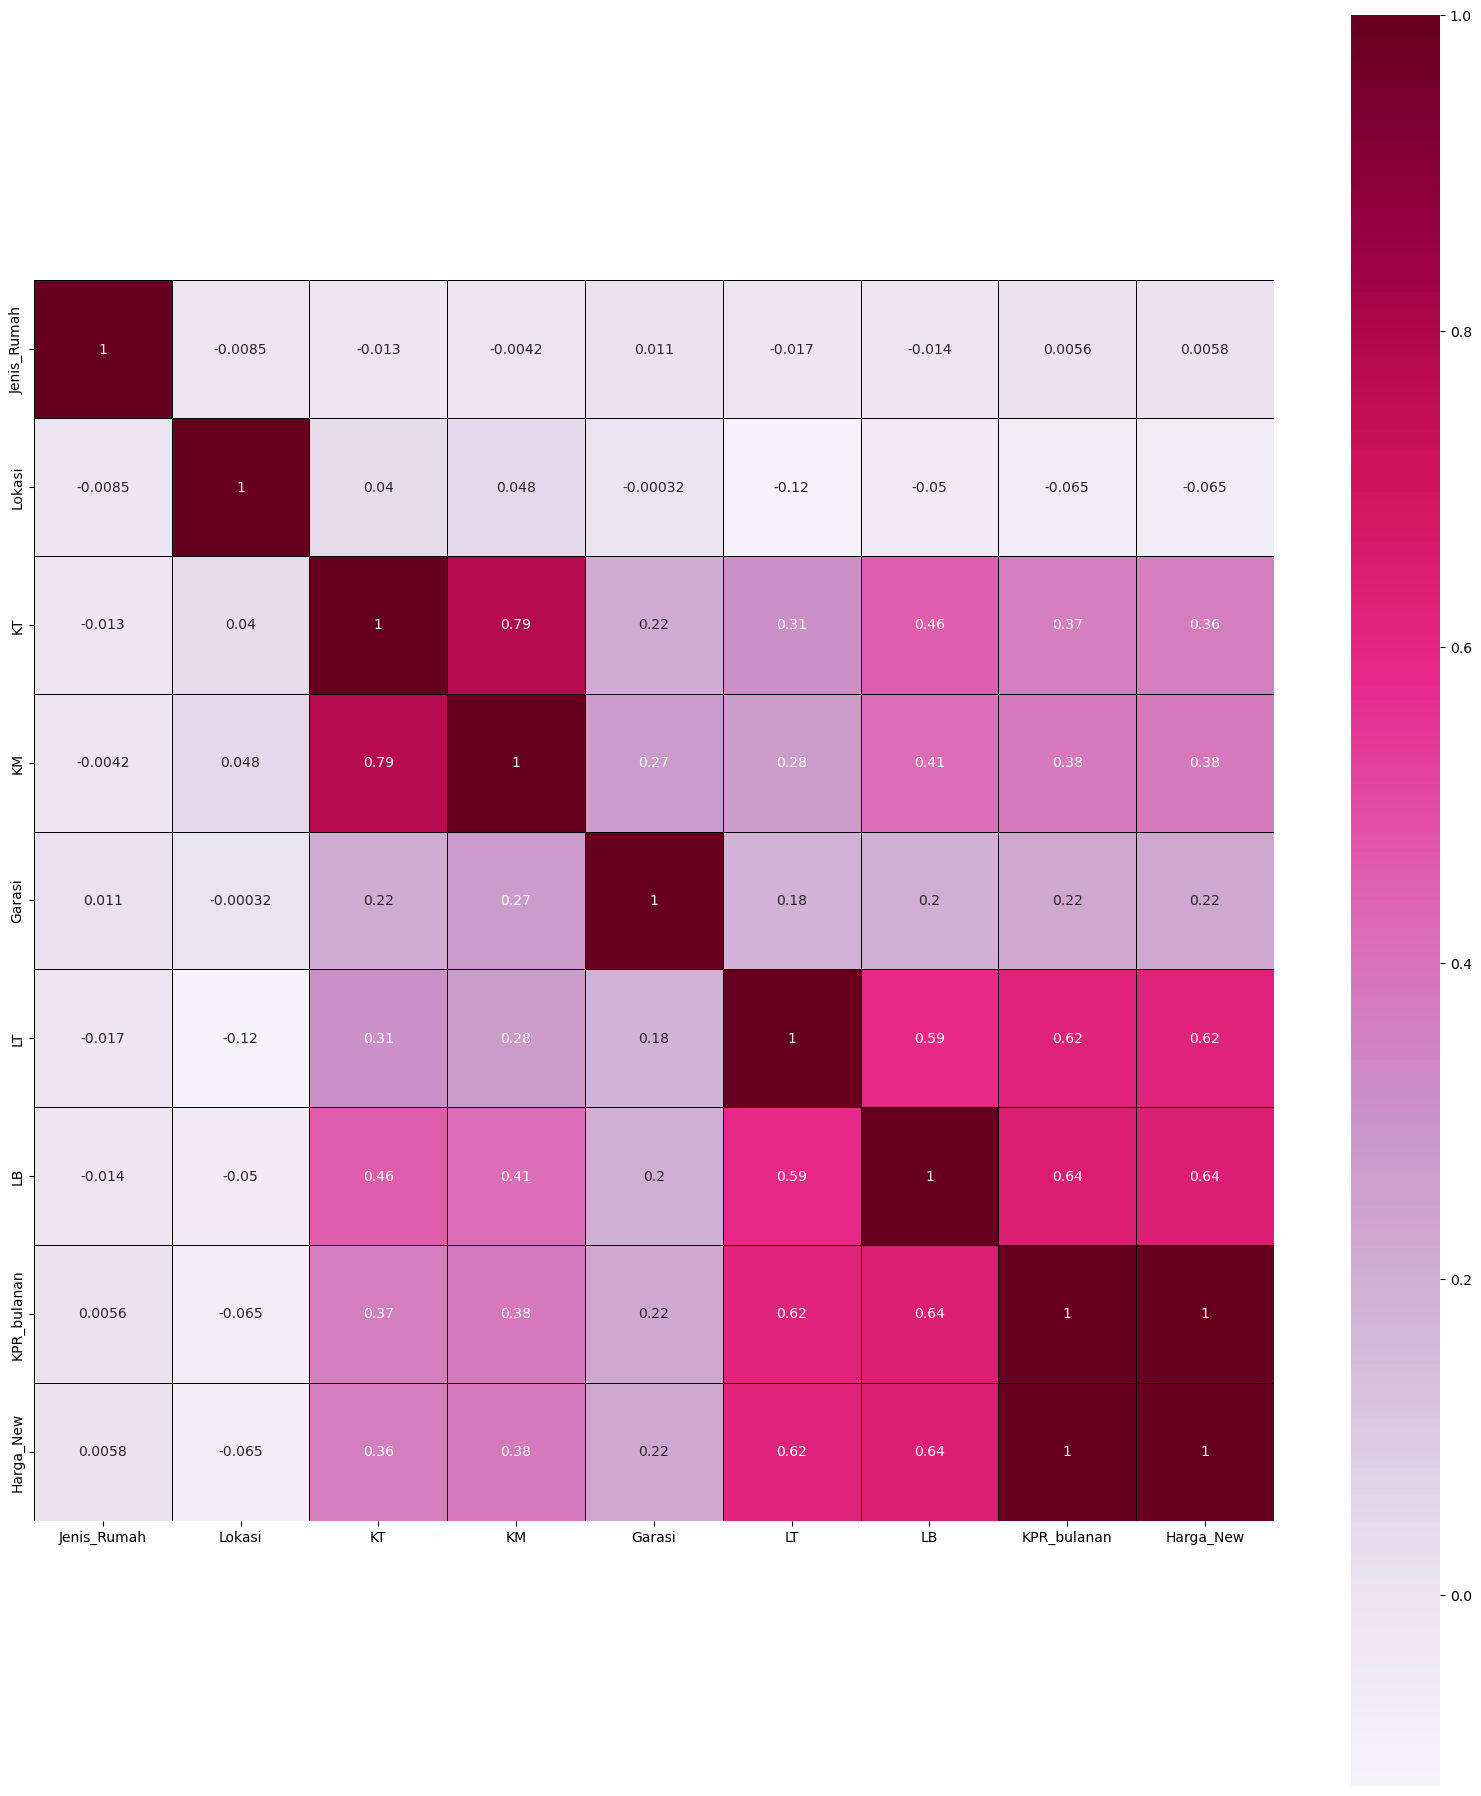

In [22]:
heat_map_modeling1 = ["Jenis_Rumah","Lokasi","KT","KM","Garasi","LT","LB","KPR_bulanan","Harga_New"]
heat_map(df_encode_cor1,heat_map_modeling1)

### Analisis korelasi data cleaning 2

In [23]:
#Mengambil beberapa kolom sample dari df_cleaning2 untuk uji korelasi
df_cor2 = df_cleaning2.loc[:,["Jenis_Rumah","Lokasi","KT","KM","Garasi","LT","LB","KPR_bulanan","Harga_New"]]
df_cor2.head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
0,Rumah,"Banyumanik, Semarang",5,3,1.0,399.0,273.0,10,2.900
2,Rumah,"Semarang Barat, Semarang",3,3,1.0,120.0,110.0,5,1.600
3,Rumah,"Tembalang, Semarang",4,3,1.0,200.0,100.0,8,2.200
4,Rumah,"Banyumanik, Semarang",4,3,2.0,300.0,200.0,11,3.200
5,Rumah,"Pedurungan, Semarang",3,2,1.0,125.0,100.0,2,0.785


In [24]:
# Mengambil tipe data object pada dataset dan di simpan di df_encode_cor2
df_category = df_cor2.select_dtypes(include='object')
df_encode_cor2 = df_cor2.copy()

for column in df_category.columns:
    df_encode_cor2[column] = label_encoder.fit_transform(df_cor2[column])

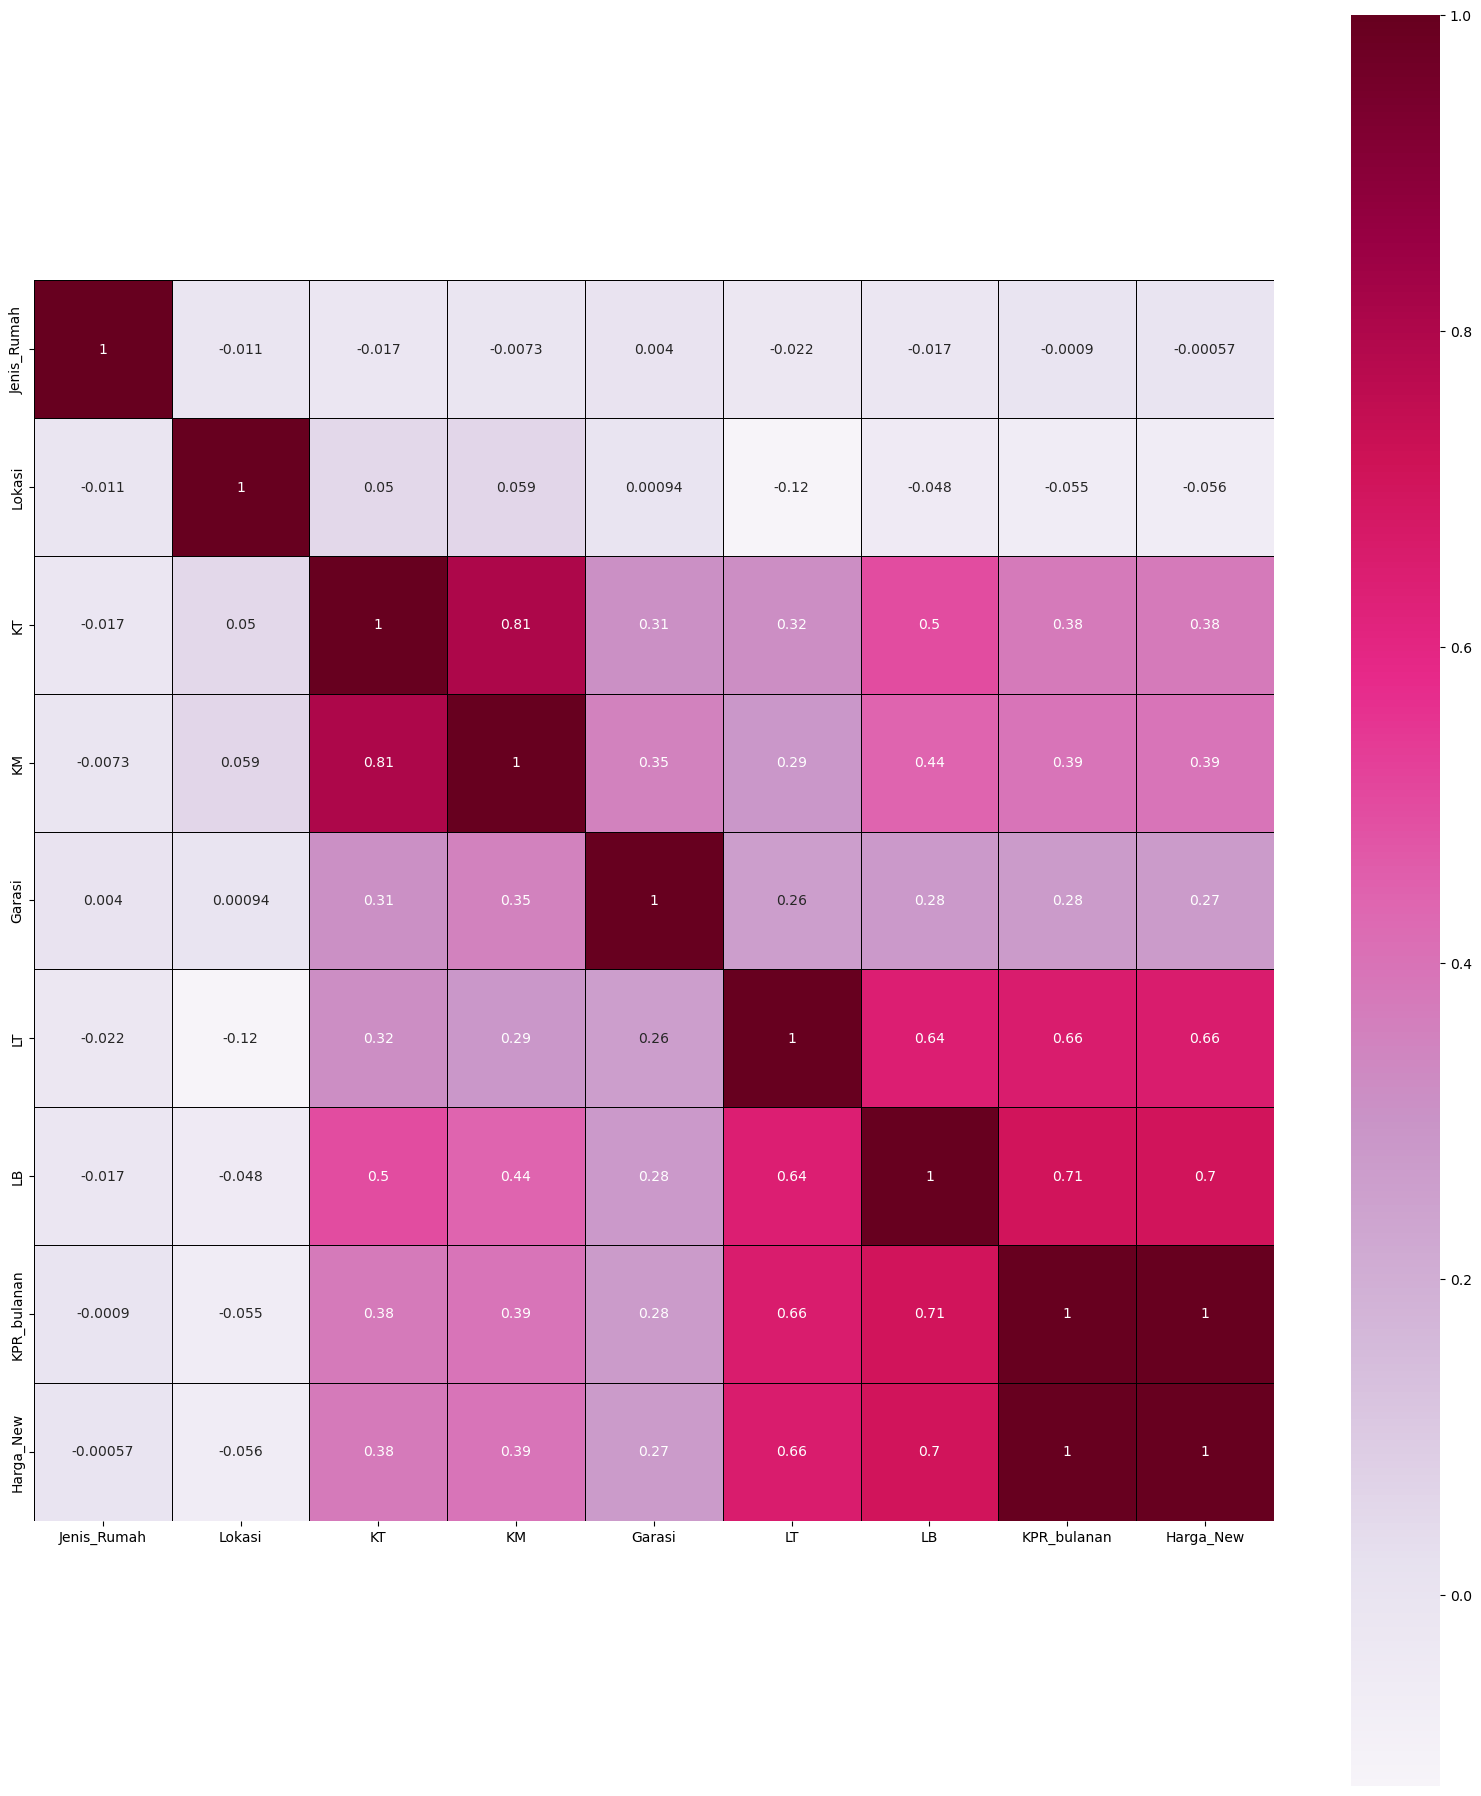

In [25]:
heat_map_modeling2 = ["Jenis_Rumah","Lokasi","KT","KM","Garasi","LT","LB","KPR_bulanan","Harga_New"]
heat_map(df_encode_cor2, heat_map_modeling2)

# Cardinality


In [ ]:
# df_card = df_cor1.loc[:,['listing-location','price_new','bed','bath','listing-floorarea']]
# df_card.head()

In [ ]:
# df_cardnew = df_card.rename(columns={'listing-location': 'location'})

In [ ]:
# print('Number of categories in the variable Hour             : {}'.format(len(df_cardnew.location.unique())))

# Feature Scaling
Feature scaling adalah teknik untuk membuat skala data setiap fitur menjadi sama. Dua teknik paling umum untuk feature scaling adalah: Normalization dan Standardization. Pada project ini, kami menggunakan Standardization. Standardization mengubah data sehingga memiliki rata-rata 0 dan variance 1, membuat datanya tidak memiliki unit awal.

## H.1. Standarisasi Data df_cleaning1

In [27]:
# scaler = StandardScaler()
# df_scaler1 = df_encode_cor1.drop(['Harga_New'],axis=1)

In [28]:
# X = scaler.fit_transform(df_scaler1)
# y = df_encode_cor1['Harga_New']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7444, 8), (3191, 8), (7444,), (3191,))

## H.1. Standarisasi Data df_cleaning2

In [29]:
# df_scaler2 = df_encode_cor2.drop(['Harga_New'],axis=1)

# X = scaler.fit_transform(df_scaler2)
# y = df_encode_cor2['Harga_New']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4783, 8), (2051, 8), (4783,), (2051,))

# Analisis
## Kondisi 1
Kondisi 1 adalah dengan menggunakan data dari df_cleaning1 (nilai null pada price diisi dengan median) & dilakukan label encoder.

In [26]:
df_kondisi1 = df_encode_cor1.loc[:,["Jenis_Rumah","Lokasi","KT","KM","Garasi","LT","LB","KPR_bulanan","Harga_New"]]
df_kondisi1.head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
0,0,0,5,3,1.0,399.0,273.0,10,2.9
1,0,9,6,3,1.0,252.0,410.0,11,3.0
2,0,9,3,3,1.0,120.0,110.0,5,1.6
3,0,14,4,3,1.0,200.0,100.0,8,2.2
4,0,0,4,3,2.0,300.0,200.0,11,3.2


In [27]:
df_kondisi1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10635 entries, 0 to 13385
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Jenis_Rumah  10635 non-null  int32  
 1   Lokasi       10635 non-null  int32  
 2   KT           10635 non-null  int64  
 3   KM           10635 non-null  int64  
 4   Garasi       10635 non-null  float64
 5   LT           10635 non-null  float64
 6   LB           10635 non-null  float64
 7   KPR_bulanan  10635 non-null  int64  
 8   Harga_New    10635 non-null  float64
dtypes: float64(4), int32(2), int64(3)
memory usage: 747.8 KB


In [28]:
## Ngecek skewness value
from scipy.stats import skew

Jenis_Rumah
15.664804911989325


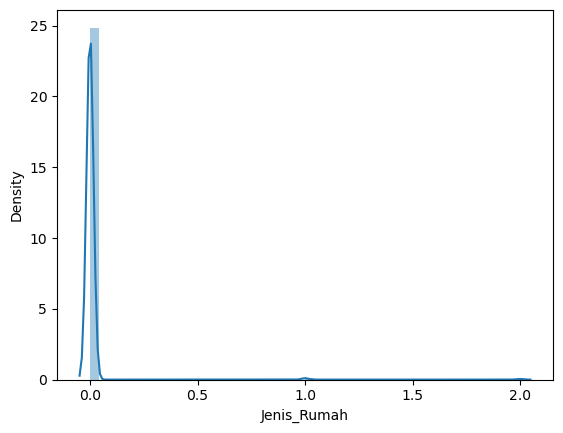

Lokasi
-0.44658129021609855


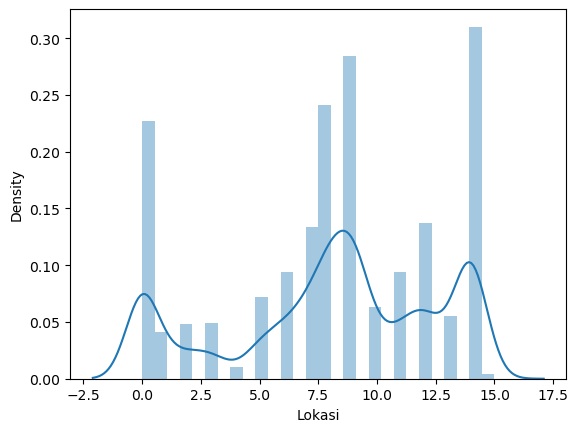

KT
5.742075694681975


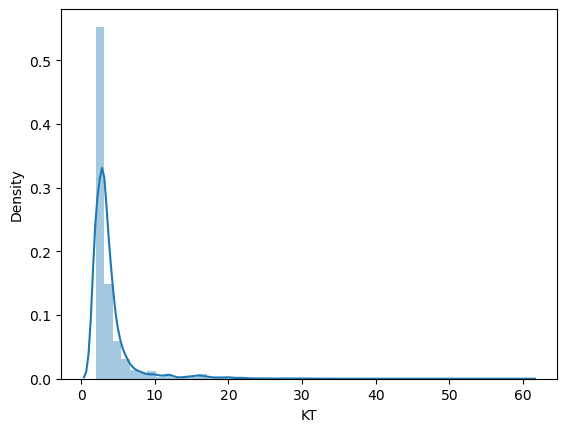

KM
5.2781283395796015


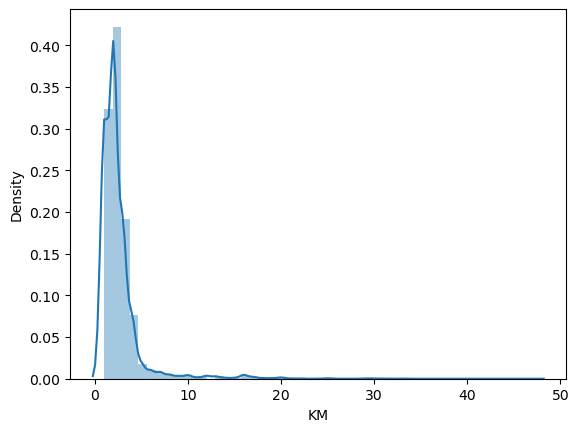

Garasi
9.33837725806165


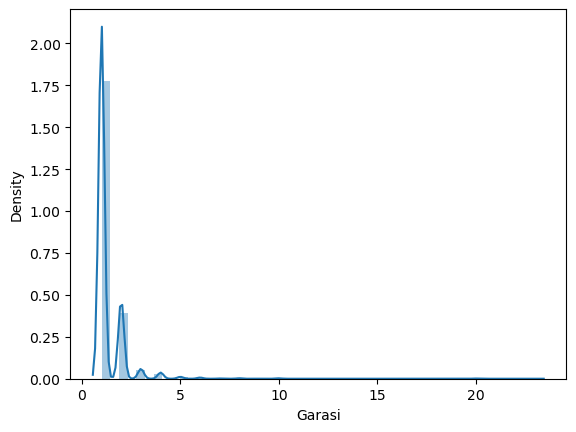

LT
5.593960588412964


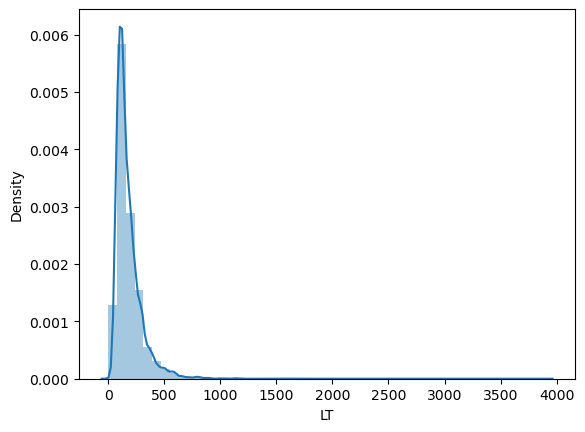

LB
6.0706458648269646


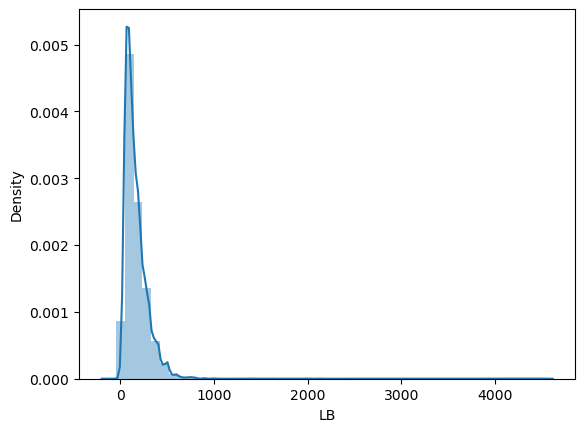

KPR_bulanan
0.993920534622295


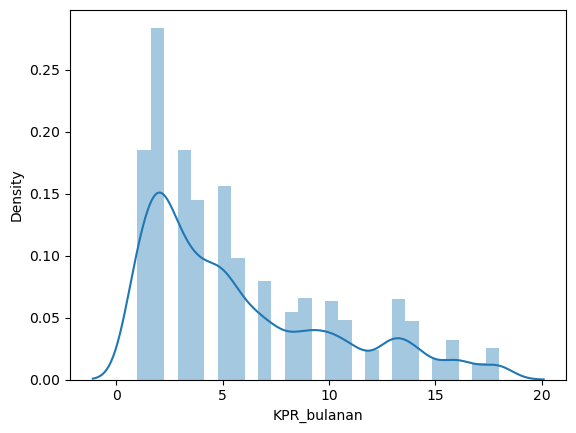

Harga_New
1.025745162009132


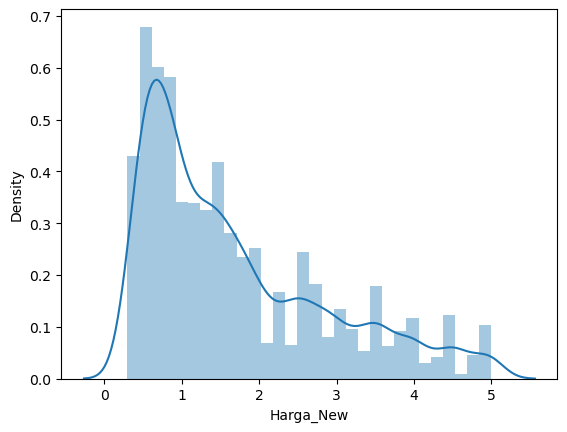

In [29]:
for col in df_kondisi1:
    print(col)
    print(skew(df_kondisi1[col]))
    
    plt.figure()
    sns.distplot(df_kondisi1[col])
    plt.show()

<AxesSubplot:>

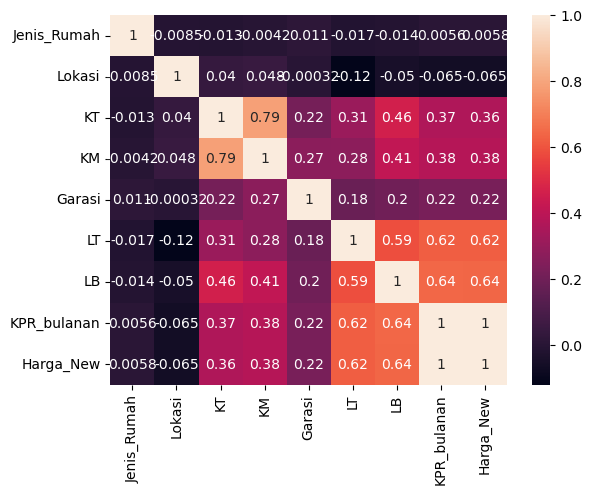

In [30]:
sns.heatmap(df_kondisi1.corr(),annot=True)

In [ ]:
# df_kondisi1["Harga_New"] = np.sqrt(df_kondisi1["Harga_New"])
# skew(df_kondisi1["Harga_New"])

In [ ]:
# def Perform_log_transform(df_kondisi1,col_log):
#     """#Perform Log Transformation of dataframe , and list of columns """
#     for colname in col_log:
#         df[colname + '_log'] = np.log(df[colname])
#     #df.drop(col_log, axis=1, inplace=True)
#     df_kondisi1.info()

In [ ]:
# #This needs to be done before the data is split
# Perform_log_transform(df_kondisi1,['Harga_New','Luas_Tanah'])

In [ ]:
# for col in df_cleaning1:
#     print(col)
#     print(skew(df_kondisi1[col]))
    
#     plt.figure()
#     sns.distplot(df_kondisi1[col])
#     plt.show()

In [39]:
# Membuat fungsi untuk visualisasi histogram dan boxplot dengan 2 parameter
def diagnostic_plots(df_kondisi1, variable):
    # Mengatur ukuran
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_kondisi1[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_kondisi1[variable])
    plt.title('Boxplot')

    plt.show()

In [40]:
select = df_kondisi1[["Harga_New"]]
select.head()

,Harga_New
0,2.9
1,3.0
2,1.6
3,2.2
4,3.2


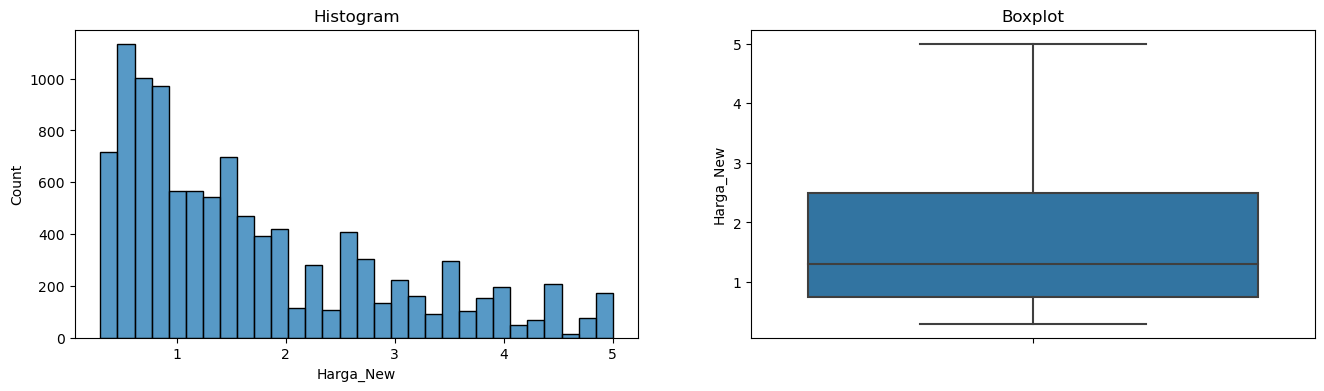

Skewness Value :  1.025889863004731


In [41]:
diagnostic_plots(select, "Harga_New")
print('Skewness Value : ', select["Harga_New"].skew())

In [42]:
# Mencari tahu data yang outliers dengan mendefinisikan fungsi
continous_features = ["Harga_New"]  
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('Pada kolom {}, jumlah outliernya adalah {}'.format(each_feature, len(outliers)))
        if drop:
            df_undersampling.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

In [43]:
outliers(df_kondisi1[continous_features])

Pada kolom Harga_New, jumlah outliernya adalah 0


<AxesSubplot:xlabel='Harga_New'>

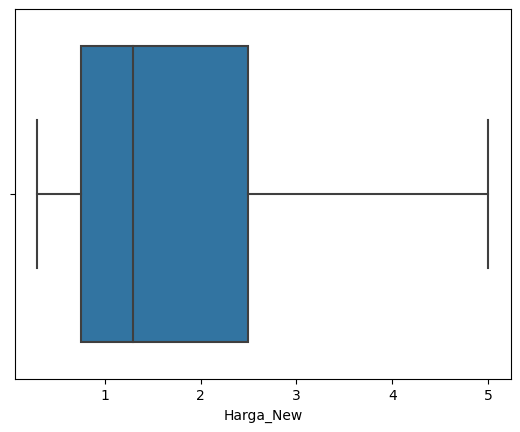

In [44]:
sns.boxplot(df_kondisi1["Harga_New"])

In [45]:
# Menghitung kuartil 1 (Q1) dari kolom 'price' dalam df_kondisi1 dan menyimpannya dalam variabel Q1
Q1 = df_kondisi1["Harga_New"].quantile(0.25) 
# Menghitung kuartil 3 (Q3) dari kolom 'price' dalam df_kondisi1 dan menyimpannya dalam variabel Q3
Q3 = df_kondisi1["Harga_New"].quantile(0.75) 
# Menghitung rentang antarkuartil (IQR) dari kolom 'price' dalam df_kondisi1 dan menyimpannya dalam variabel IQR
IQR = Q3-Q1
print("Nilai Kuartil 1 : " ,Q1)
print("Nilai Kuartil 3 : " ,Q3)
print("Nilai Rentang : " ,IQR)

Nilai Kuartil 1 :  0.75
Nilai Kuartil 3 :  2.5
Nilai Rentang :  1.75


In [46]:
df_kondisi1[df_kondisi1["Harga_New"] > (Q3 + (1.5 * IQR))].head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New


In [47]:
df_kondisi1[df_kondisi1["Harga_New"] < (Q1 - (1.5 * IQR))]

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New


In [48]:
print('Data sebelum di hilangkan outliernya :', df_kondisi1.shape)
df_kondisi1= df_kondisi1[~((df_kondisi1["Harga_New"]>(Q3+(1.5*IQR))))]
print('Data sesudah dihilangkan outliernya :', df_kondisi1.shape)

Data sebelum di hilangkan outliernya : (10635, 9)
Data sesudah dihilangkan outliernya : (10635, 9)


<AxesSubplot:xlabel='Harga_New'>

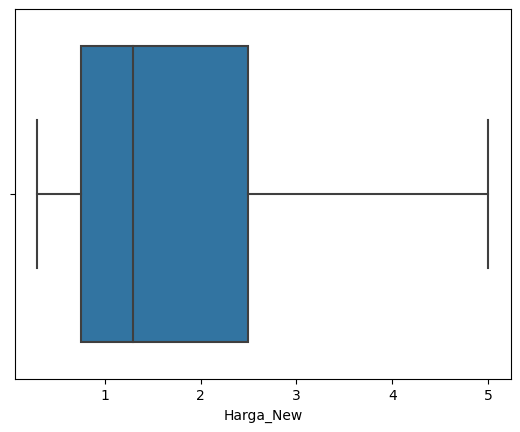

In [49]:
sns.boxplot(df_kondisi1["Harga_New"])

In [50]:
df_kondisi1.head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
0,0,0,5,3,1.0,399.0,273.0,10,2.9
1,0,9,6,3,1.0,252.0,410.0,11,3.0
2,0,9,3,3,1.0,120.0,110.0,5,1.6
3,0,14,4,3,1.0,200.0,100.0,8,2.2
4,0,0,4,3,2.0,300.0,200.0,11,3.2


# I.2. Kondisi 2
Menggunakan data dari df_cleaning1 (mengisi nilai null pada price dengan median) & dilakukan one hot encoding.


In [51]:
df_kondisi2 = df_cleaning1.loc[:,["Jenis_Rumah","Lokasi","KT","KM","Garasi","LT","LB","KPR_bulanan","Harga_New"]]
df_kondisi2.head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
0,Rumah,"Banyumanik, Semarang",5,3,1.0,399.0,273.0,10,2.9
1,Rumah,"Semarang Barat, Semarang",6,3,1.0,252.0,410.0,11,3.0
2,Rumah,"Semarang Barat, Semarang",3,3,1.0,120.0,110.0,5,1.6
3,Rumah,"Tembalang, Semarang",4,3,1.0,200.0,100.0,8,2.2
4,Rumah,"Banyumanik, Semarang",4,3,2.0,300.0,200.0,11,3.2


In [52]:
df_kondisi2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10635 entries, 0 to 13385
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Jenis_Rumah  10635 non-null  object 
 1   Lokasi       10635 non-null  object 
 2   KT           10635 non-null  int64  
 3   KM           10635 non-null  int64  
 4   Garasi       10635 non-null  float64
 5   LT           10635 non-null  float64
 6   LB           10635 non-null  float64
 7   KPR_bulanan  10635 non-null  int64  
 8   Harga_New    10635 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 830.9+ KB


In [53]:
# Membuat fungsi untuk visualisasi histogram dan boxplot dengan 2 parameter
def diagnostic_plots(df_kondisi2, variable):
    # Mengatur ukuran
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_kondisi2[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_kondisi2[variable])
    plt.title('Boxplot')

    plt.show()

In [54]:
select = df_kondisi2[['Harga_New']]
select.head()

,Harga_New
0,2.9
1,3.0
2,1.6
3,2.2
4,3.2


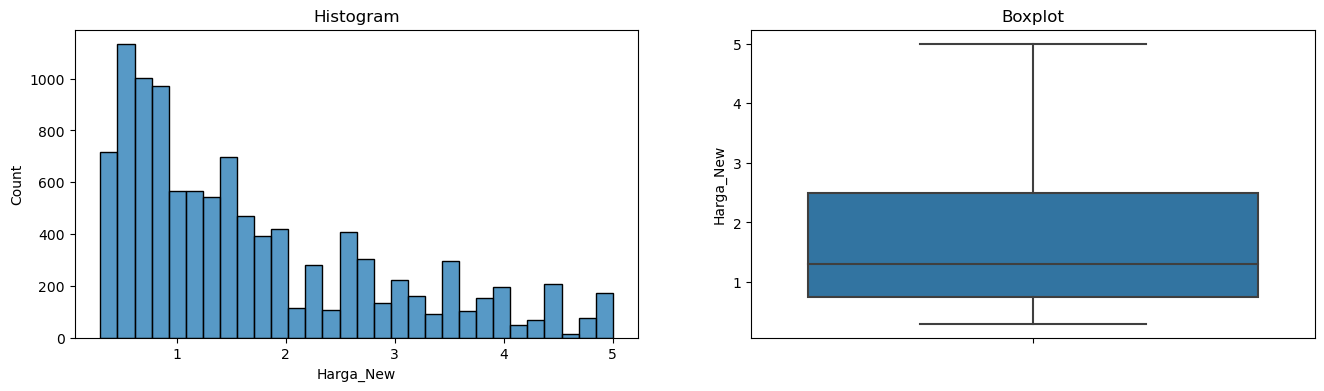

Skewness Value :  1.025889863004731


In [55]:
diagnostic_plots(select, 'Harga_New')
print('Skewness Value : ', select['Harga_New'].skew())

In [57]:
df_encode_kondisi2 = df_encode_cor1.loc[:,["Jenis_Rumah","Lokasi","KT","KM","Garasi","LT","LB","KPR_bulanan","Harga_New"]]
df_encode_kondisi2.head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
0,0,0,5,3,1.0,399.0,273.0,10,2.9
1,0,9,6,3,1.0,252.0,410.0,11,3.0
2,0,9,3,3,1.0,120.0,110.0,5,1.6
3,0,14,4,3,1.0,200.0,100.0,8,2.2
4,0,0,4,3,2.0,300.0,200.0,11,3.2


In [58]:
outliers(df_encode_kondisi2[continous_features])

Pada kolom Harga_New, jumlah outliernya adalah 0


In [59]:
# Menghitung kuartil 1 (Q1) dari kolom 'price' dalam df_encode_kondisi2 dan menyimpannya dalam variabel Q1
Q1 = df_encode_kondisi2['Harga_New'].quantile(0.25) 
# Menghitung kuartil 3 (Q3) dari kolom 'price' dalam df_encode_kondisi2 dan menyimpannya dalam variabel Q3
Q3 = df_encode_kondisi2['Harga_New'].quantile(0.75) 
# Menghitung rentang antarkuartil (IQR) dari kolom 'price' dalam df_encode_kondisi2 dan menyimpannya dalam variabel IQR
IQR = Q3-Q1
print("Nilai Kuartil 1 : " ,Q1)
print("Nilai Kuartil 3 : " ,Q3)
print("Nilai Rentang : " ,IQR)

Nilai Kuartil 1 :  0.75
Nilai Kuartil 3 :  2.5
Nilai Rentang :  1.75


<AxesSubplot:xlabel='Harga_New'>

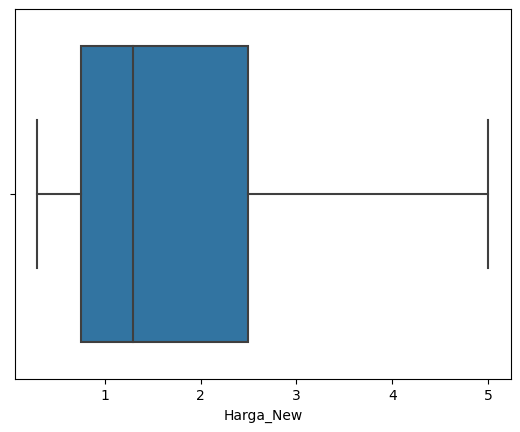

In [60]:
sns.boxplot(df_encode_kondisi2["Harga_New"])

In [61]:
df_encode_kondisi2[df_encode_kondisi2["Harga_New"] > (Q3 + (1.5 * IQR))].head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New


In [62]:
df_encode_kondisi2[df_encode_kondisi2["Harga_New"] < (Q1 - (1.5 * IQR))]

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New


In [63]:
print('Data sebelum di hilangkan outliernya :', df_kondisi2.shape)
df_encode_kondisi2 = df_encode_kondisi2[~((df_encode_kondisi2["Harga_New"]>(Q3+(1.5*IQR))))]
print('Data sesudah dihilangkan outliernya :', df_encode_kondisi2.shape)

Data sebelum di hilangkan outliernya : (10635, 9)
Data sesudah dihilangkan outliernya : (10635, 9)


<AxesSubplot:xlabel='Harga_New'>

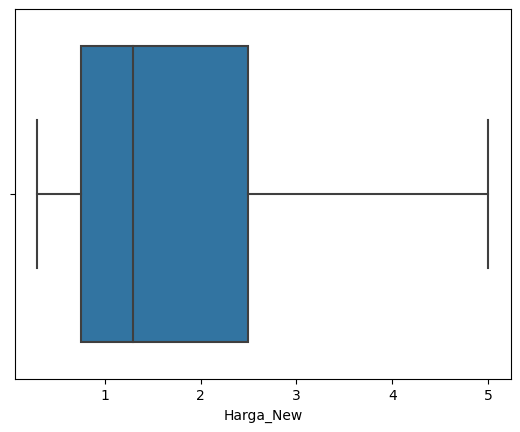

In [64]:
sns.boxplot(df_encode_kondisi2["Harga_New"])

### One Hot Encoding

In [65]:
def one_hot_encoder(data, feature, keep_first=True):
    # Melakukan one-hot encoding pada fitur yang diberikan
    one_hot_cols = pd.get_dummies(data[feature])
    
    # Mengganti nama setiap kolom dalam DataFrame one_hot_cols
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col}, axis=1, inplace=True)
    
    # Menggabungkan DataFrame one_hot_cols dengan dataset data
    new_data = pd.concat([data, one_hot_cols], axis=1)
    # Menghapus fitur yang telah diencode
    new_data.drop(feature, axis=1, inplace=True)
    
    # Jika keep_first di set sebagai False, maka fitur pertama akan dihapus dari hasil encoding
    if keep_first == False:
        new_data = new_data.iloc[:, 1:]
    
    return new_data

In [66]:
# Melakukan copy dataframe df_kondisi2 menjadi df_onehot_kondisi2
df_onehot_kondisi2 = df_kondisi2.copy()

# Looping untuk setiap kolom yang memiliki tipe data object (string)
for col in df_onehot_kondisi2.select_dtypes(include='O').columns:
    # Menggunakan fungsi one_hot_encoder untuk melakukan one-hot encoding pada kolom tersebut
    df_onehot_kondisi2 = one_hot_encoder(df_onehot_kondisi2, col)

# Menampilkan 5 baris pertama dari dataframe df_onehot_kondisi2
df_onehot_kondisi2.head()

,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New,Jenis_Rumah_Rumah,Jenis_Rumah_Rumah\nFeatured,Jenis_Rumah_Rumah\nPremier,"Lokasi_Banyumanik, Semarang","Lokasi_Candisari, Semarang","Lokasi_Gajah Mungkur, Semarang","Lokasi_Gayamsari, Semarang","Lokasi_Genuk, Semarang","Lokasi_Gunung Pati, Semarang","Lokasi_Mijen, Semarang","Lokasi_Ngaliyan, Semarang","Lokasi_Pedurungan, Semarang","Lokasi_Semarang Barat, Semarang","Lokasi_Semarang Selatan, Semarang","Lokasi_Semarang Tengah, Semarang","Lokasi_Semarang Timur, Semarang","Lokasi_Semarang Utara, Semarang","Lokasi_Tembalang, Semarang","Lokasi_Tugu, Semarang"
0,5,3,1.0,399.0,273.0,10,2.9,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,3,1.0,252.0,410.0,11,3.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,3,1.0,120.0,110.0,5,1.6,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,3,1.0,200.0,100.0,8,2.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,3,2.0,300.0,200.0,11,3.2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
df_onehot_kondisi2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10635 entries, 0 to 13385
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   KT                                 10635 non-null  int64  
 1   KM                                 10635 non-null  int64  
 2   Garasi                             10635 non-null  float64
 3   LT                                 10635 non-null  float64
 4   LB                                 10635 non-null  float64
 5   KPR_bulanan                        10635 non-null  int64  
 6   Harga_New                          10635 non-null  float64
 7   Jenis_Rumah_Rumah                  10635 non-null  uint8  
 8   Jenis_Rumah_Rumah
Featured         10635 non-null  uint8  
 9   Jenis_Rumah_Rumah
Premier          10635 non-null  uint8  
 10  Lokasi_Banyumanik, Semarang        10635 non-null  uint8  
 11  Lokasi_Candisari, Semarang         10635 non-null  uin

# I.3. Kondisi 3
Menggunakan data dari df_cleaning2 (menghapus nilai null) & dilakukan one hot onceding

In [68]:
df_kondisi3 = df_cleaning2.loc[:,["Jenis_Rumah","Lokasi","KT","KM","Garasi","LT","LB","KPR_bulanan","Harga_New"]]
df_kondisi3.head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
0,Rumah,"Banyumanik, Semarang",5,3,1.0,399.0,273.0,10,2.900
2,Rumah,"Semarang Barat, Semarang",3,3,1.0,120.0,110.0,5,1.600
3,Rumah,"Tembalang, Semarang",4,3,1.0,200.0,100.0,8,2.200
4,Rumah,"Banyumanik, Semarang",4,3,2.0,300.0,200.0,11,3.200
5,Rumah,"Pedurungan, Semarang",3,2,1.0,125.0,100.0,2,0.785


In [69]:
# Membuat fungsi untuk visualisasi histogram dan boxplot dengan 2 parameter
def diagnostic_plots(df_kondisi3, variable):
    # Mengatur ukuran
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_kondisi3[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_kondisi3[variable])
    plt.title('Boxplot')

    plt.show()

In [70]:
select = df_kondisi3[['Harga_New']]
select.head()

,Harga_New
0,2.900
2,1.600
3,2.200
4,3.200
5,0.785


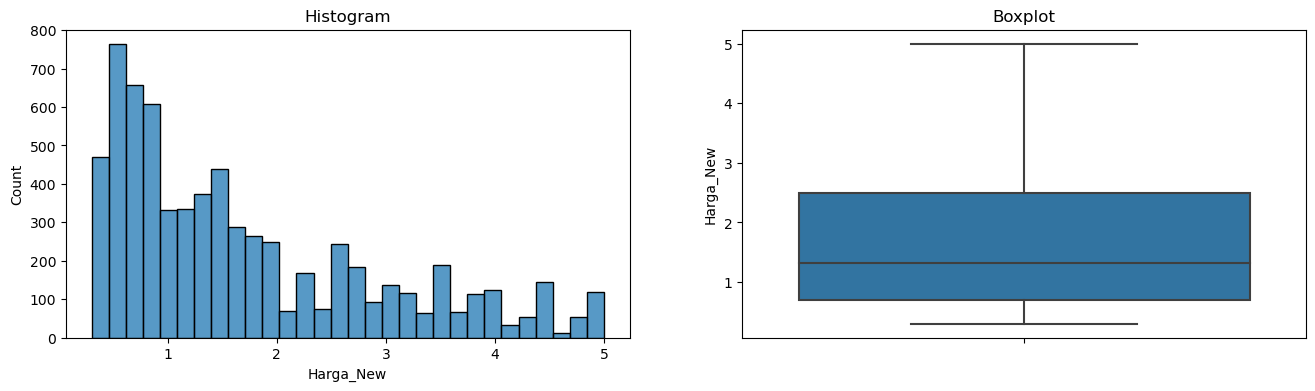

Skewness Value :  1.007764985879162


In [71]:
diagnostic_plots(select, 'Harga_New')
print('Skewness Value : ', select['Harga_New'].skew())

In [72]:
df_encode_kondisi3 = df_encode_cor2.loc[:,["Jenis_Rumah","Lokasi","KT","KM","Garasi","LT","LB","KPR_bulanan","Harga_New"]]
df_encode_kondisi3.head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
0,0,0,5,3,1.0,399.0,273.0,10,2.900
2,0,9,3,3,1.0,120.0,110.0,5,1.600
3,0,14,4,3,1.0,200.0,100.0,8,2.200
4,0,0,4,3,2.0,300.0,200.0,11,3.200
5,0,8,3,2,1.0,125.0,100.0,2,0.785


In [73]:
outliers(df_encode_kondisi3[continous_features])

Pada kolom Harga_New, jumlah outliernya adalah 0


In [74]:
# Menghitung kuartil 1 (Q1) dari kolom 'price' dalam df_encode_kondisi3 dan menyimpannya dalam variabel Q1
Q1 = df_encode_kondisi2['Harga_New'].quantile(0.25) 
# Menghitung kuartil 3 (Q3) dari kolom 'price' dalam df_encode_kondisi3 dan menyimpannya dalam variabel Q3
Q3 = df_encode_kondisi2['Harga_New'].quantile(0.75) 
# Menghitung rentang antarkuartil (IQR) dari kolom 'price' dalam df_encode_kondisi3 dan menyimpannya dalam variabel IQR
IQR = Q3-Q1
print("Nilai Kuartil 1 : " ,Q1)
print("Nilai Kuartil 3 : " ,Q3)
print("Nilai Rentang : " ,IQR)

Nilai Kuartil 1 :  0.75
Nilai Kuartil 3 :  2.5
Nilai Rentang :  1.75


<AxesSubplot:xlabel='Harga_New'>

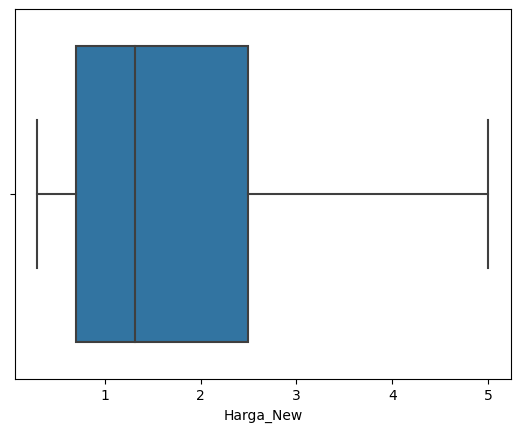

In [75]:
sns.boxplot(df_encode_kondisi3["Harga_New"])

In [76]:
df_encode_kondisi3[df_encode_kondisi3["Harga_New"] > (Q3 + (1.5 * IQR))].head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New


In [77]:
df_encode_kondisi3[df_encode_kondisi3["Harga_New"] < (Q1 - (1.5 * IQR))]

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New


In [78]:
print('Data sebelum di hilangkan outliernya :', df_kondisi3.shape)
df_encode_kondisi3 = df_encode_kondisi3[~((df_encode_kondisi3["Harga_New"]>(Q3+(1.5*IQR))))]
print('Data sesudah dihilangkan outliernya :', df_encode_kondisi3.shape)

Data sebelum di hilangkan outliernya : (6834, 9)
Data sesudah dihilangkan outliernya : (6834, 9)


<AxesSubplot:xlabel='Harga_New'>

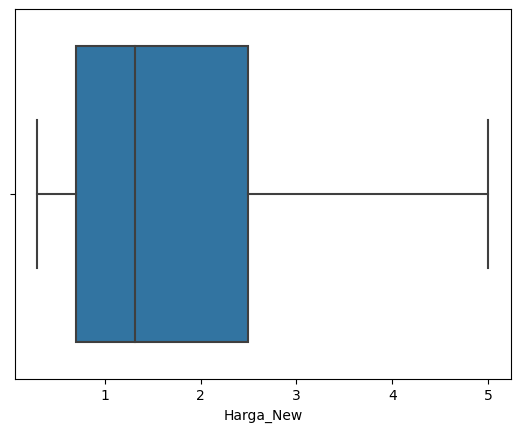

In [79]:
sns.boxplot(df_encode_kondisi3["Harga_New"])

In [80]:
# Melakukan copy dataframe df_kondisi3 menjadi df_onehot_kondisi3
df_onehot_kondisi3 = df_kondisi3.copy()

# Looping untuk setiap kolom yang memiliki tipe data object (string)
for col in df_onehot_kondisi3.select_dtypes(include='O').columns:
    # Menggunakan fungsi one_hot_encoder untuk melakukan one-hot encoding pada kolom tersebut
    df_onehot_kondisi3 = one_hot_encoder(df_onehot_kondisi3, col)

# Menampilkan 5 baris pertama dari dataframe df_onehot_kondisi3
df_onehot_kondisi3.head()

,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New,Jenis_Rumah_Rumah,Jenis_Rumah_Rumah\nFeatured,Jenis_Rumah_Rumah\nPremier,"Lokasi_Banyumanik, Semarang","Lokasi_Candisari, Semarang","Lokasi_Gajah Mungkur, Semarang","Lokasi_Gayamsari, Semarang","Lokasi_Genuk, Semarang","Lokasi_Gunung Pati, Semarang","Lokasi_Mijen, Semarang","Lokasi_Ngaliyan, Semarang","Lokasi_Pedurungan, Semarang","Lokasi_Semarang Barat, Semarang","Lokasi_Semarang Selatan, Semarang","Lokasi_Semarang Tengah, Semarang","Lokasi_Semarang Timur, Semarang","Lokasi_Semarang Utara, Semarang","Lokasi_Tembalang, Semarang","Lokasi_Tugu, Semarang"
0,5,3,1.0,399.0,273.0,10,2.900,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,3,1.0,120.0,110.0,5,1.600,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,3,1.0,200.0,100.0,8,2.200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,3,2.0,300.0,200.0,11,3.200,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3,2,1.0,125.0,100.0,2,0.785,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# I.4. Kondisi 4
Menggunakan data dari df_cleaning2 (menghapus nilai null pada kolom price) & dilakukan label encoder

In [81]:
df_kondisi4 = df_encode_cor2.loc[:,["Jenis_Rumah","Lokasi","KT","KM","Garasi","LT","LB","KPR_bulanan","Harga_New"]]
df_kondisi4.head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
0,0,0,5,3,1.0,399.0,273.0,10,2.900
2,0,9,3,3,1.0,120.0,110.0,5,1.600
3,0,14,4,3,1.0,200.0,100.0,8,2.200
4,0,0,4,3,2.0,300.0,200.0,11,3.200
5,0,8,3,2,1.0,125.0,100.0,2,0.785


In [82]:
# Membuat fungsi untuk visualisasi histogram dan boxplot dengan 2 parameter
def diagnostic_plots(df_kondisi4, variable):
    # Mengatur ukuran
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_kondisi4[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_kondisi4[variable])
    plt.title('Boxplot')

    plt.show()

In [83]:
select = df_kondisi4[["Harga_New"]]
select.head()

,Harga_New
0,2.900
2,1.600
3,2.200
4,3.200
5,0.785


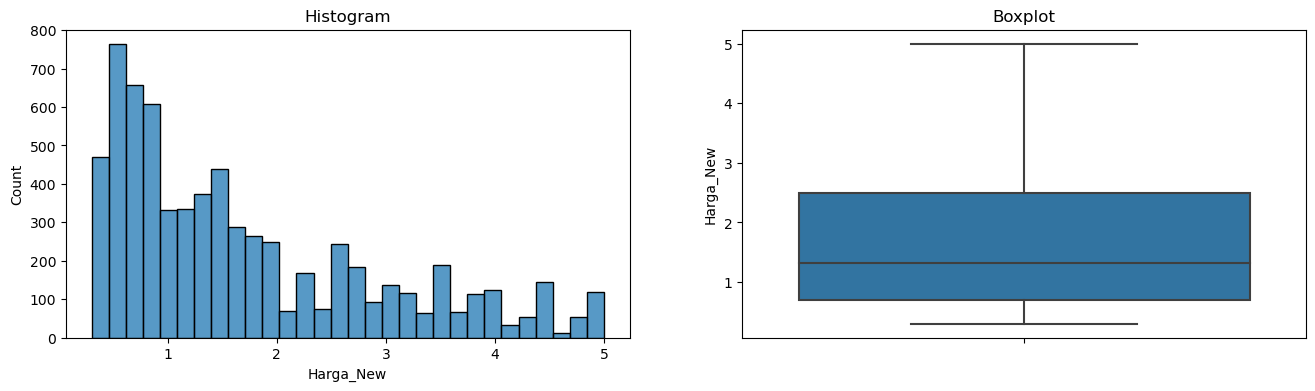

Skewness Value :  1.007764985879162


In [84]:
diagnostic_plots(select, "Harga_New")
print('Skewness Value : ', select["Harga_New"].skew())

In [85]:
outliers(df_kondisi4[continous_features])

Pada kolom Harga_New, jumlah outliernya adalah 0


In [86]:
# Menghitung kuartil 1 (Q1) dari kolom 'price' dalam df_kondisi4 dan menyimpannya dalam variabel Q1
Q1 = df_kondisi4["Harga_New"].quantile(0.25) 
# Menghitung kuartil 3 (Q3) dari kolom 'price' dalam df_kondisi4 dan menyimpannya dalam variabel Q3
Q3 = df_kondisi4["Harga_New"].quantile(0.75) 
# Menghitung rentang antarkuartil (IQR) dari kolom 'price' dalam df_kondisi4 dan menyimpannya dalam variabel IQR
IQR = Q3-Q1
print("Nilai Kuartil 1 : " ,Q1)
print("Nilai Kuartil 3 : " ,Q3)
print("Nilai Rentang : " ,IQR)

Nilai Kuartil 1 :  0.7012499999999999
Nilai Kuartil 3 :  2.5
Nilai Rentang :  1.79875


<AxesSubplot:xlabel='Harga_New'>

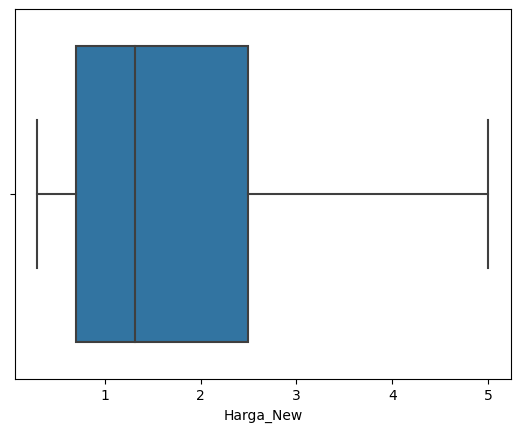

In [87]:
sns.boxplot(df_kondisi4["Harga_New"])

In [88]:
df_kondisi4[df_kondisi4["Harga_New"] > (Q3 + (1.5 * IQR))].head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New


In [89]:
df_kondisi4[df_kondisi4["Harga_New"] < (Q1 - (1.5 * IQR))]

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New


In [90]:
print('Data sebelum di hilangkan outliernya :', df_kondisi4.shape)
df_kondisi4= df_kondisi4[~((df_kondisi4["Harga_New"]>(Q3+(1.5*IQR))))]
print('Data sesudah dihilangkan outliernya :', df_kondisi4.shape)

Data sebelum di hilangkan outliernya : (6834, 9)
Data sesudah dihilangkan outliernya : (6834, 9)


<AxesSubplot:xlabel='Harga_New'>

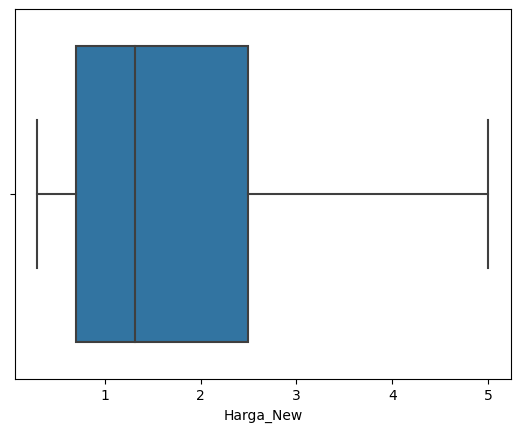

In [91]:
sns.boxplot(df_kondisi4["Harga_New"])

In [92]:
df_kondisi4.head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,KPR_bulanan,Harga_New
0,0,0,5,3,1.0,399.0,273.0,10,2.900
2,0,9,3,3,1.0,120.0,110.0,5,1.600
3,0,14,4,3,1.0,200.0,100.0,8,2.200
4,0,0,4,3,2.0,300.0,200.0,11,3.200
5,0,8,3,2,1.0,125.0,100.0,2,0.785


# J. Pendefinisian Model
Mendefinisikan model linear regression.

In [93]:
model = LinearRegression()

# K. Pelatihan Model
Pelatihan model adalah proses untuk menjalankan sebuah algoritma machine learning untuk dapat mengolah dataset di dalamnya yang sudah terbagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola maupun output tertentu.

## K.1. Kondisi 1

In [94]:
x = df_kondisi1.drop(columns=["Harga_New"],axis=1).values
y = df_kondisi1["Harga_New"].values

# Memisahkan data menjadi data training dan data testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)

In [95]:
model_kondisi1 = model.fit(x_train1, y_train1)
y_pred1 = model_kondisi1.predict(x_test1)

## Kondisi 2

In [96]:
x = df_onehot_kondisi2.drop(columns=["Harga_New"],axis=1).values
y = df_onehot_kondisi2["Harga_New"].values

# Memisahkan data menjadi data training dan data testing
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=0)

In [97]:
model_kondisi2 = model.fit(x_train2, y_train2)
y_pred2 = model_kondisi2.predict(x_test2)

## Kondisi 3

In [98]:
x = df_onehot_kondisi3.drop(columns=["Harga_New"],axis=1).values
y = df_onehot_kondisi3["Harga_New"].values

# Memisahkan data menjadi data training dan data testing
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.3, random_state=0)

In [99]:
model_kondisi3 = model.fit(x_train3, y_train3)
y_pred3 = model_kondisi3.predict(x_test3)

## Kondisi 4

In [100]:
x = df_kondisi4.drop(columns=["Harga_New"],axis=1).values
y = df_kondisi4["Harga_New"].values

# Memisahkan data menjadi data training dan data testing
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.3, random_state=0)

In [101]:
model_kondisi4 = model.fit(x_train4, y_train4)
y_pred4 = model_kondisi4.predict(x_test4)

# Evaluasi Model
Evaluasi model adalah menguji akurasi data testing menggunakan evaluasi model setelah Pelatihan Model. Pada Linear Regression didalamnya berisi :

R-squared, MSE, RMSE
Nilai intercept dan slope
Melihat harga hasil prediksi dan perbandingan dengan harga aktual
Membuat visualisasi regresi masing-masing kondisi

## L.1. Kondisi 1
L.1.1. Mencari nilai R-squared, MSE, dan RMSE
R squared, merupakan angka yang berkisar antara 0 sampai 1 yang mengindikasikan besarnya kombinasi variabel independen secara bersama – sama mempengaruhi nilai variabel dependen atau bisa disebut juga dengan akurasi (%).
Mean Squared Error (MSE), adalah Rata-rata Kesalahan kuadrat antara nilai aktual dan nilai peramalan.
Root Mean Square Error (RMSE), adalah jumlah dari kesalahan kuadrat atau selisih antara nilai sebenarnya dengan nilai prediksi yang telah ditentukan.

In [102]:
mse1 = mean_squared_error(y_test1, y_pred1) 
rmse1 = np.sqrt(mse1)  
print('Nilai R-squared : ', r2_score(y_test1, y_pred1)*100) 
print('Nilai MSE : ', mse1)  
print('Nilai RMSE : ', rmse1)  

Nilai R-squared :  99.6156722155056
Nilai MSE :  0.0058438256009112205
Nilai RMSE :  0.07644491873833878


In [103]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
MAE = mean_absolute_error(y_test1,y_pred1)
MAPE = mean_absolute_percentage_error(y_test1,y_pred1)
print('Nilai MAE : ', MAE)  
print('Nilai MAPE : ', MAPE) 

Nilai MAE :  0.06634903222114633
Nilai MAPE :  0.06151762953157551


In [104]:
coef1 = model_kondisi1.coef_
intercept = model_kondisi1.intercept_
print("Nilai intercept :", model_kondisi1.intercept_)
print("Nilai slope :", model_kondisi1.coef_)

Nilai intercept : 0.13732660023015297
Nilai slope : [ 1.73468580e-03 -1.72672948e-04 -1.27101578e-03  1.33486212e-03
 -1.75784986e-03  3.77818706e-05 -9.44366586e-06  2.67640184e-01]


In [105]:
y_pred1

array([0.67200559, 1.74589074, 0.40260168, ..., 3.88409075, 0.93863929,
       4.15773505])

In [106]:
kondisi1 = pd.DataFrame({'Actual':y_test1, 'Predicted':y_pred1})
kondisi1.head()

,Actual,Predicted
0,0.784,0.672006
1,1.650,1.745891
2,0.350,0.402602
3,1.100,1.207853
4,0.600,0.670363


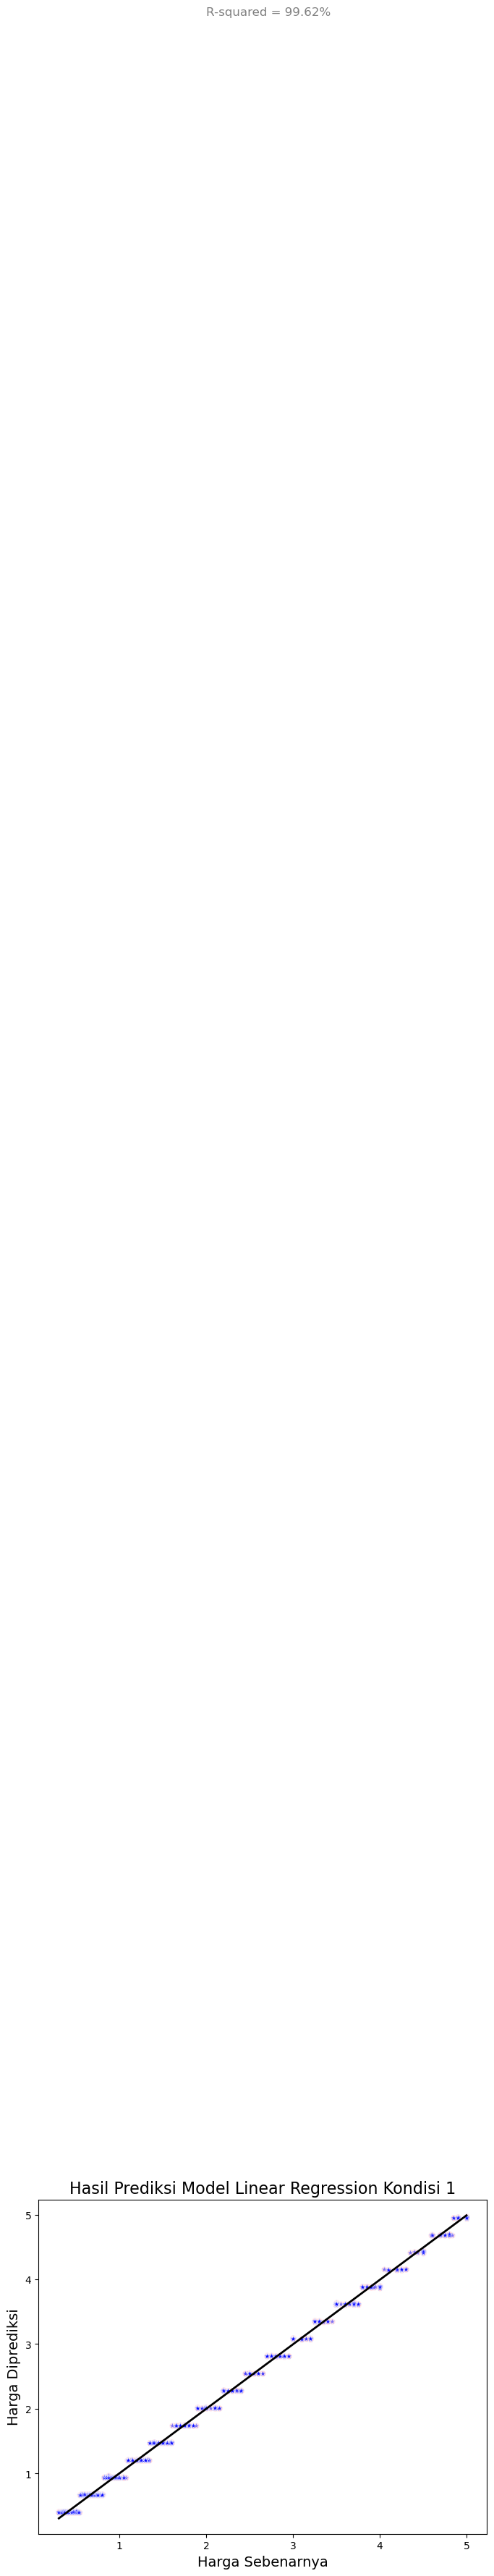

In [107]:
condition1 = (y_test1 < 50) # kondisi untuk subset pertama
subset1_x1 = y_test1
subset1_y1 = y_pred1

subset2_x1 = y_test1
subset2_y1 = y_pred1

# Buat scatter plot untuk setiap subset dengan marker yang berbeda
plt.figure(figsize=(8,6))
sns.scatterplot(x=subset1_x1, y=subset1_y1, color='pink', alpha=0.5, marker='o')
sns.scatterplot(x=subset2_x1, y=subset2_y1, color='blue', alpha=0.5, marker='*')

# Menambahkan garis regresi untuk seluruh data
sns.regplot(x=y_test1, y=y_pred1, color='black', scatter=False, line_kws={'lw':2})

plt.title('Hasil Prediksi Model Linear Regression Kondisi 1', fontsize=16)
plt.xlabel('Harga Sebenarnya', fontsize=14)
plt.ylabel('Harga Diprediksi', fontsize=14)

# Menambahkan anotasi
plt.text(2, 39, f'R-squared = {round(r2_score(y_test1, y_pred1)*100, 2)}%', fontsize=12, color='grey')

plt.show()

# random forest

In [108]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=5, random_state = 42,n_estimators=200 )

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)


RF.fit(x_train1,y_train1)
y_pred1 = RF.predict(x_test1)

In [109]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)

# evaluating the model
print("Mean Squared Error : {}".format(mse))
print("Root Mean Squared Error : {}".format(rmse))
print("Training Score :", RF.score(x_train1, y_train1))
print("R squared :",r2_score(y_test1, y_pred1))

Mean Squared Error : 0.005053876608737691
Root Mean Squared Error : 0.07109062250914455
Training Score : 0.9967006198667824
R squared : 0.9967226191585682


In [110]:
from sklearn.model_selection import cross_validate
scores = cross_validate(RF,x_test1, y_test1,  cv=5)
scores

{'fit_time': array([0.64296222, 0.63721752, 0.69930243, 0.61254883, 0.74110913]),
 'score_time': array([0.01646447, 0.03289056, 0.01794481, 0.02491808, 0.02591586]),
 'test_score': array([0.99717637, 0.99620166, 0.99647952, 0.99659035, 0.9962347 ])}

## Kondisi 2

In [111]:
mse2 = mean_squared_error(y_test2, y_pred2)  
rmse2 = np.sqrt(mse2)  
print("Nilai R-squared :", r2_score(y_test2, y_pred2)*100)
print("Nilai MSE :", mse2)  
print("Nilai RMSE :", rmse2)  

Nilai R-squared : 99.59791272873892
Nilai MSE : 0.005864728744524484
Nilai RMSE : 0.07658151699022737


In [112]:
coef2 = model_kondisi2.coef_
intercept = model_kondisi2.intercept_
print("Nilai intercept :", model_kondisi2.intercept_)
print("Nilai slope :", model_kondisi2.coef_)

Nilai intercept : 0.13732660023015297
Nilai slope : [ 1.73468580e-03 -1.72672948e-04 -1.27101578e-03  1.33486212e-03
 -1.75784986e-03  3.77818706e-05 -9.44366586e-06  2.67640184e-01]


In [113]:
y_pred2

array([0.40687117, 0.67401292, 1.47113224, ..., 1.20429143, 3.62187446,
       4.96021924])

In [114]:
kondisi2 = pd.DataFrame({'Actual':y_test2, 'Predicted':y_pred2})
kondisi2.head()

,Actual,Predicted
0,0.498,0.406871
1,0.750,0.674013
2,1.600,1.471132
3,2.050,2.005644
4,0.700,0.667970


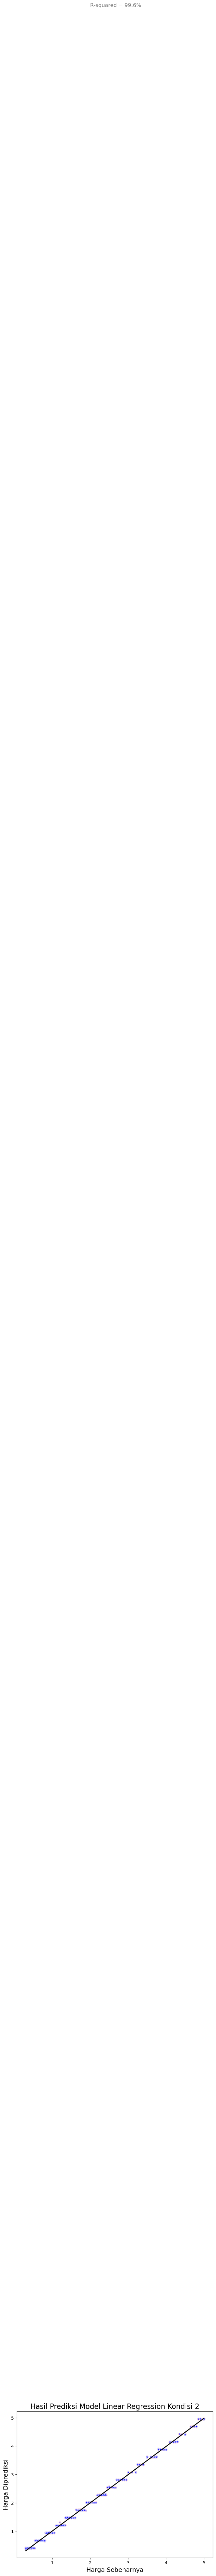

In [115]:
condition2 = (y_test2 < 50) # kondisi untuk subset pertama
subset1_x2 = y_test2
subset1_y2 = y_pred2

subset2_x2 = y_test2
subset2_y2 = y_pred2

# Buat scatter plot untuk setiap subset dengan marker yang berbeda
plt.figure(figsize=(8,6))
sns.scatterplot(x=subset1_x2, y=subset1_y2, color='pink', alpha=0.5, marker='o')
sns.scatterplot(x=subset2_x2, y=subset2_y2, color='blue', alpha=0.5, marker='*')

# Menambahkan garis regresi untuk seluruh data
sns.regplot(x=y_test2, y=y_pred2, color='black', scatter=False, line_kws={'lw':2})

plt.title('Hasil Prediksi Model Linear Regression Kondisi 2', fontsize=16)
plt.xlabel('Harga Sebenarnya', fontsize=14)
plt.ylabel('Harga Diprediksi', fontsize=14)

# Menambahkan anotasi
plt.text(2, 90, f'R-squared = {round(r2_score(y_test2, y_pred2)*100, 2)}%', fontsize=12, color='grey')

plt.show()

## Kondisi 3

In [116]:
mse3 = mean_squared_error(y_test3, y_pred3)  # Menghitung Mean Squared Error (MSE)
rmse3 = np.sqrt(mse3)  # Menghitung akar kuadrat dari MSE, yang merupakan Root Mean Squared Error (RMSE)
print("Nilai R-squared :", r2_score(y_test3, y_pred3)*100)  # Menghitung R-squared (koefisien determinasi) dan mencetak hasilnya dalam persentase
print("Nilai MSE :", mse3)  # Mencetak nilai MSE
print("Nilai RMSE :", rmse3)  # Mencetak nilai RMSE

Nilai R-squared : 99.6001055888731
Nilai MSE : 0.006006190442685075
Nilai RMSE : 0.07749961575830602


In [117]:
coef3 = model_kondisi3.coef_
intercept = model_kondisi3.intercept_
print("Nilai intercept :", model_kondisi3.intercept_)
print("Nilai slope :", model_kondisi3.coef_)

Nilai intercept : 0.13732660023015297
Nilai slope : [ 1.73468580e-03 -1.72672948e-04 -1.27101578e-03  1.33486212e-03
 -1.75784986e-03  3.77818706e-05 -9.44366586e-06  2.67640184e-01]


In [118]:
y_pred3

array([0.67363134, 1.20457159, 2.81218987, ..., 0.66560997, 0.94067177,
       0.66655397])

In [119]:
kondisi3 = pd.DataFrame({'Actual':y_test3, 'Predicted':y_pred3})
kondisi3.head()

,Actual,Predicted
0,0.55,0.673631
1,1.25,1.204572
2,2.80,2.812190
3,0.95,0.941935
4,0.65,0.669243


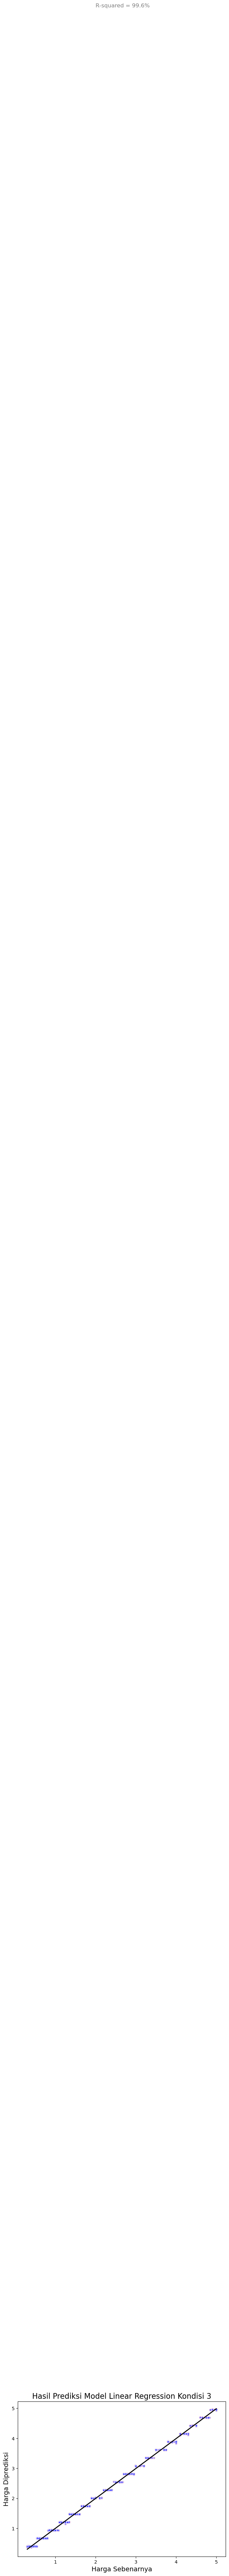

In [120]:
condition3 = (y_test3 < 50) # kondisi untuk subset pertama
subset1_x3 = y_test3
subset1_y3 = y_pred3

subset2_x3 = y_test3
subset2_y3 = y_pred3

# Buat scatter plot untuk setiap subset dengan marker yang berbeda
plt.figure(figsize=(8,6))
sns.scatterplot(x=subset1_x3, y=subset1_y3, color='pink', alpha=0.5, marker='o')
sns.scatterplot(x=subset2_x3, y=subset2_y3, color='blue', alpha=0.5, marker='*')

# Menambahkan garis regresi untuk seluruh data
sns.regplot(x=y_test3, y=y_pred3, color='black', scatter=False, line_kws={'lw':2})

plt.title('Hasil Prediksi Model Linear Regression Kondisi 3', fontsize=16)
plt.xlabel('Harga Sebenarnya', fontsize=14)
plt.ylabel('Harga Diprediksi', fontsize=14)

# Menambahkan anotasi
plt.text(2, 85, f'R-squared = {round(r2_score(y_test3, y_pred3)*100, 2)}%', fontsize=12, color='grey')

plt.show()

## Kondisi 4

In [121]:
mse4 = mean_squared_error(y_test4, y_pred4)  
rmse4 = np.sqrt(mse4)  
print("Nilai R-squared :", r2_score(y_test4, y_pred4)*100)  
print("Nilai MSE :", mse4)  
print("Nilai RMSE :", rmse4)  

Nilai R-squared : 99.59931223738336
Nilai MSE : 0.006018106138435721
Nilai RMSE : 0.0775764535051437


In [122]:
coef4 = model_kondisi4.coef_
intercept = model_kondisi4.intercept_
print("Nilai intercept :", model_kondisi4.intercept_)
print("Nilai slope :", model_kondisi4.coef_)

Nilai intercept : 0.13732660023015297
Nilai slope : [ 1.73468580e-03 -1.72672948e-04 -1.27101578e-03  1.33486212e-03
 -1.75784986e-03  3.77818706e-05 -9.44366586e-06  2.67640184e-01]


In [123]:
y_pred4

array([0.67085815, 1.20747931, 2.81346471, ..., 0.67082513, 0.93814886,
       0.66973589])

In [124]:
kondisi4 = pd.DataFrame({'Actual':y_test4, 'Predicted':y_pred4})
kondisi4.head()

,Actual,Predicted
0,0.55,0.670858
1,1.25,1.207479
2,2.80,2.813465
3,0.95,0.939275
4,0.65,0.671961


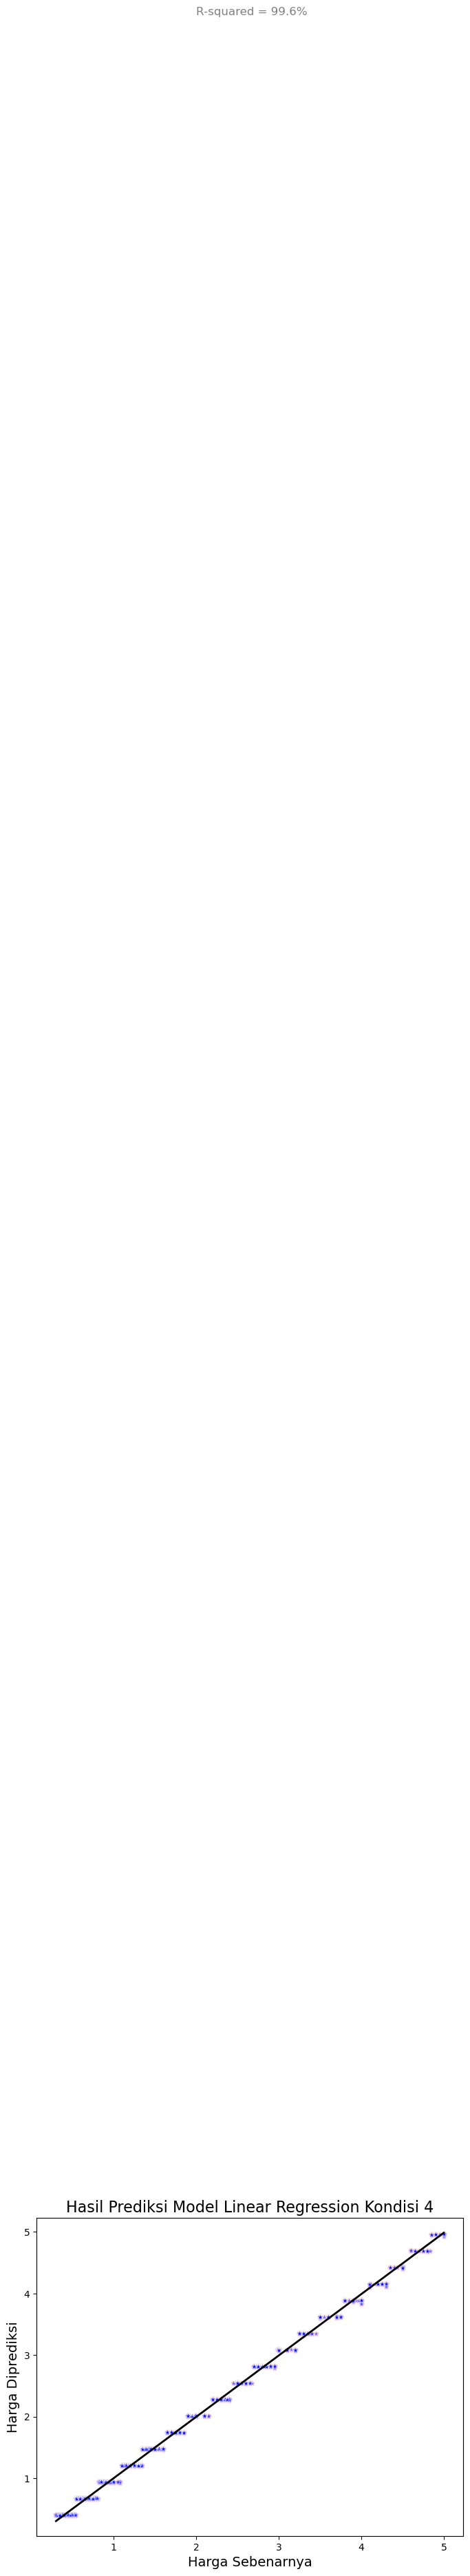

In [125]:
condition4 = (y_test4 < 50) # kondisi untuk subset pertama
subset1_x4 = y_test4
subset1_y4 = y_pred4

subset2_x4 = y_test4
subset2_y4 = y_pred4

# Buat scatter plot untuk setiap subset dengan marker yang berbeda
plt.figure(figsize=(8,6))
sns.scatterplot(x=subset1_x4, y=subset1_y4, color='pink', alpha=0.5, marker='o')
sns.scatterplot(x=subset2_x4, y=subset2_y4, color='blue', alpha=0.5, marker='*')

# Menambahkan garis regresi untuk seluruh data
sns.regplot(x=y_test4, y=y_pred4, color='black', scatter=False, line_kws={'lw':2})

plt.title('Hasil Prediksi Model Linear Regression Kondisi 4', fontsize=16)
plt.xlabel('Harga Sebenarnya', fontsize=14)
plt.ylabel('Harga Diprediksi', fontsize=14)

# Menambahkan anotasi
plt.text(2, 41, f'R-squared = {round(r2_score(y_test4, y_pred4)*100, 2)}%', fontsize=12, color='grey')

plt.show()

# Model Inference

In [126]:
# Memasukkan data dengan Jenis_Rumah = 0, Lokasi = 14, KT=3, KM=5, Garasi=1, LT=120, LB=100, KPR_bulanan= 8
input_data = np.array([[0,14,3,5,1,120,100,8]])
prediction = model_kondisi1.predict(input_data)
print("prediksi harga :", prediction)

prediksi harga : [2.28072352]


In [127]:
model_inference = {'JR':[1,0,2,0,1],
                   'LK':[0,2,10,14,12],
                   'K_T':[1,4,2,3,1],
                   'K_M':[2,1,4,1,3],
                   'GR':[1,2,1,1,2],
                   'L_T':[100,95,120,150,87],
                   'L_B':[90,84,100,120,76],
                   'KPR':[3,1,4,5,2]
                  }
model_inference = pd.DataFrame(model_inference)
model_inference

,JR,LK,K_T,K_M,GR,L_T,L_B,KPR
0,1,0,1,2,1,100,90,3
1,0,2,4,1,2,95,84,1
2,2,10,2,4,1,120,100,4
3,0,14,3,1,1,150,120,5
4,1,12,1,3,2,87,76,2


In [136]:
prediksi = model_kondisi1.predict(model_inference*1000)
prediksi

array([ 807.36168041,  262.96327385, 1077.06973004, 1336.21883138,
        536.86748021])

# Deployment


In [137]:
import pickle

filename = 'prediksi_harga_rumah_smg.sav'
pickle.dump(model_kondisi1, open(filename,'wb'))